In [1]:
!conda info -e

# conda environments:
#
base                  *  C:\Users\vicae\anaconda3
PythonData               C:\Users\vicae\anaconda3\envs\PythonData
data-06-weatherpy        C:\Users\vicae\anaconda3\envs\data-06-weatherpy
rstudio                  C:\Users\vicae\anaconda3\envs\rstudio
weatherpy                C:\Users\vicae\anaconda3\envs\weatherpy



In [2]:
!conda list gmaps

# packages in environment at C:\Users\vicae\anaconda3:
#
# Name                    Version                   Build  Channel
gmaps                     0.9.0                      py_0    conda-forge


In [3]:
# Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URl for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data. 
city_data = []
# Print the beginning of the logging. 
print("Beginning Data Retrieval    ")
print("----------------------------")
# Create counters.
record_count =1
set_count = 1

# Create an empty list to hold the weather data. 
city_data = []
# Print the beginning of the logging. 
print("Beginning Data Retrieval    ")
print("----------------------------")
# Create counters.
record_count =1
set_count = 1# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 5o for logging purposes.
    if (i %  50 == 0 and i>= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | tamandare
Processing Record 2 of Set 1 | gazli
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | coihaique
Processing Record 7 of Set 1 | aklavik
Processing Record 8 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | mentougou
Processing Record 11 of Set 1 | boa vista
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of S

Processing Record 34 of Set 4 | aflu
City not found. Skipping...
Processing Record 35 of Set 4 | san matias
Processing Record 36 of Set 4 | nishihara
Processing Record 37 of Set 4 | ormara
Processing Record 38 of Set 4 | samandag
Processing Record 39 of Set 4 | xapuri
Processing Record 40 of Set 4 | sunam
Processing Record 41 of Set 4 | sampit
Processing Record 42 of Set 4 | montceau-les-mines
Processing Record 43 of Set 4 | ust-maya
Processing Record 44 of Set 4 | mani
Processing Record 45 of Set 4 | inirida
Processing Record 46 of Set 4 | alvorada
Processing Record 47 of Set 4 | rocha
Processing Record 48 of Set 4 | mount isa
Processing Record 49 of Set 4 | xining
Processing Record 50 of Set 4 | tasiilaq
Processing Record 1 of Set 5 | sur
Processing Record 2 of Set 5 | zhuanghe
Processing Record 3 of Set 5 | saldanha
Processing Record 4 of Set 5 | lagoa
Processing Record 5 of Set 5 | toliary
City not found. Skipping...
Processing Record 6 of Set 5 | severo-kurilsk
Processing Record 7

Processing Record 23 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 24 of Set 8 | fort nelson
Processing Record 25 of Set 8 | tessalit
Processing Record 26 of Set 8 | bay roberts
Processing Record 27 of Set 8 | dalmatovo
Processing Record 28 of Set 8 | mahina
Processing Record 29 of Set 8 | vila velha
Processing Record 30 of Set 8 | luderitz
Processing Record 31 of Set 8 | douentza
Processing Record 32 of Set 8 | albacete
Processing Record 33 of Set 8 | namatanai
Processing Record 34 of Set 8 | fomboni
Processing Record 35 of Set 8 | brigantine
Processing Record 36 of Set 8 | channel-port aux basques
Processing Record 37 of Set 8 | sokolo
Processing Record 38 of Set 8 | puerto carreno
Processing Record 39 of Set 8 | galgani
City not found. Skipping...
Processing Record 40 of Set 8 | tiksi
Processing Record 41 of Set 8 | salalah
Processing Record 42 of Set 8 | shelburne
Processing Record 43 of Set 8 | huarmey
Processing Record 44 of Set 8 | sept-iles
Processing Rec

Processing Record 5 of Set 12 | leningradskiy
Processing Record 6 of Set 12 | vavozh
Processing Record 7 of Set 12 | urucui
Processing Record 8 of Set 12 | conde
Processing Record 9 of Set 12 | isangel
Processing Record 10 of Set 12 | sol-iletsk
Processing Record 11 of Set 12 | mariakani
Processing Record 12 of Set 12 | acarau
Processing Record 13 of Set 12 | panglao
Processing Record 14 of Set 12 | aripuana
Processing Record 15 of Set 12 | kodinsk
Processing Record 16 of Set 12 | gyanpur
Processing Record 17 of Set 12 | oga
Processing Record 18 of Set 12 | ancud
Processing Record 19 of Set 12 | shibetsu
Processing Record 20 of Set 12 | jagatsinghapur
Processing Record 21 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 22 of Set 12 | longlac
City not found. Skipping...
Processing Record 23 of Set 12 | ilulissat
Processing Record 24 of Set 12 | kysyl-syr
Processing Record 25 of Set 12 | troitsk
Processing Record 26 of Set 12 | scarborough
Processing Record 27 of 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tamandare,-8.7597,-35.1047,76.87,80,86,7.92,BR,2022-06-21 23:39:05
1,Gazli,40.1333,63.4500,78.03,23,2,11.12,UZ,2022-06-21 23:39:06
2,Rikitea,-23.1203,-134.9692,73.17,64,95,9.51,PF,2022-06-21 23:38:40
3,Lebu,-37.6167,-73.6500,51.22,85,100,4.23,CL,2022-06-21 23:39:06
4,Cherskiy,68.7500,161.3000,51.53,36,49,5.61,RU,2022-06-21 23:39:07
5,Coihaique,-45.5752,-72.0662,29.01,93,0,2.30,CL,2022-06-21 23:36:48
6,Aklavik,68.2191,-135.0107,68.00,34,20,5.75,CA,2022-06-21 23:39:07
7,Pevek,69.7008,170.3133,33.24,76,72,4.52,RU,2022-06-21 23:39:07
8,Mentougou,39.9392,116.0917,77.94,54,92,3.98,CN,2022-06-21 23:39:08
9,Boa Vista,2.8197,-60.6733,78.78,83,40,5.75,BR,2022-06-21 23:35:09


In [13]:
# Reordering the columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tamandare,BR,2022-06-21 23:39:05,-8.7597,-35.1047,76.87,80,86,7.92
1,Gazli,UZ,2022-06-21 23:39:06,40.1333,63.4500,78.03,23,2,11.12
2,Rikitea,PF,2022-06-21 23:38:40,-23.1203,-134.9692,73.17,64,95,9.51
3,Lebu,CL,2022-06-21 23:39:06,-37.6167,-73.6500,51.22,85,100,4.23
4,Cherskiy,RU,2022-06-21 23:39:07,68.7500,161.3000,51.53,36,49,5.61
5,Coihaique,CL,2022-06-21 23:36:48,-45.5752,-72.0662,29.01,93,0,2.30
6,Aklavik,CA,2022-06-21 23:39:07,68.2191,-135.0107,68.00,34,20,5.75
7,Pevek,RU,2022-06-21 23:39:07,69.7008,170.3133,33.24,76,72,4.52
8,Mentougou,CN,2022-06-21 23:39:08,39.9392,116.0917,77.94,54,92,3.98
9,Boa Vista,BR,2022-06-21 23:35:09,2.8197,-60.6733,78.78,83,40,5.75


In [14]:
# Create the output file (CSV)
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1655855576.9118876

In [17]:
today = time.strftime("%x")
today

'06/21/22'

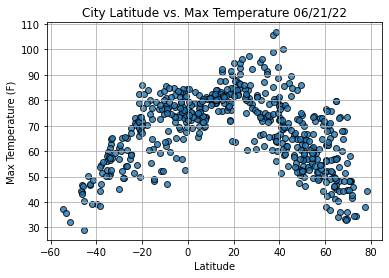

In [18]:
# Import time module
import time

# Add Dependencies
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

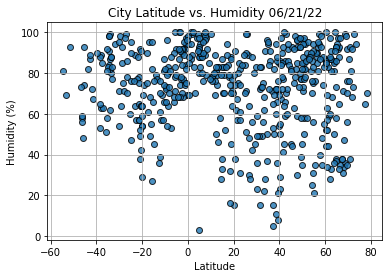

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig2.png")

# Show plot.
plt.show()

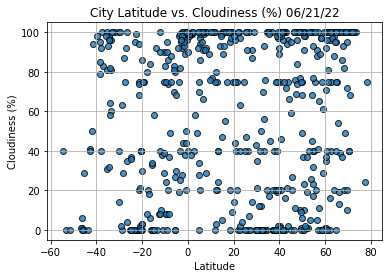

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

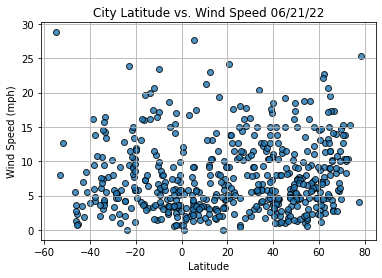

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=11, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                       Dikson
Country                        RU
Date          2022-06-21 23:39:09
Lat                       73.5069
Lng                       80.5464
Max Temp                     34.3
Humidity                       94
Cloudiness                    100
Wind Speed                  15.21
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
531     True
532     True
533     True
534     True
535     True
Name: Lat, Length: 536, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Gazli,UZ,2022-06-21 23:39:06,40.1333,63.4500,78.03,23,2,11.12
4,Cherskiy,RU,2022-06-21 23:39:07,68.7500,161.3000,51.53,36,49,5.61
6,Aklavik,CA,2022-06-21 23:39:07,68.2191,-135.0107,68.00,34,20,5.75
7,Pevek,RU,2022-06-21 23:39:07,69.7008,170.3133,33.24,76,72,4.52
8,Mentougou,CN,2022-06-21 23:39:08,39.9392,116.0917,77.94,54,92,3.98


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

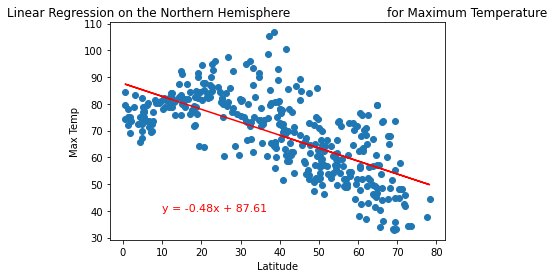

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

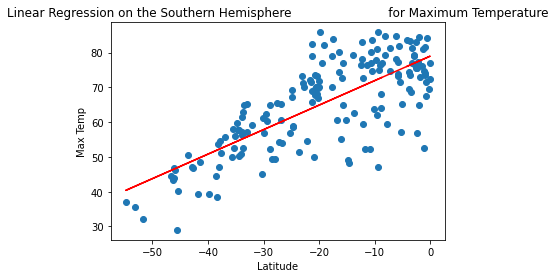

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

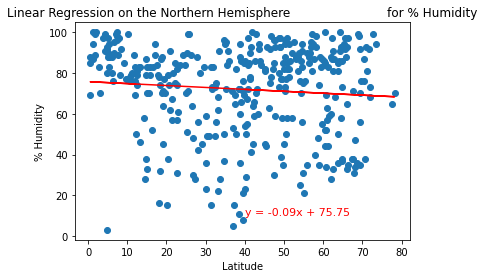

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

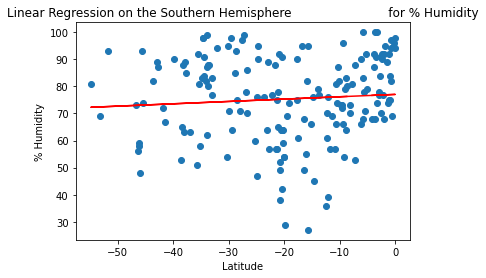

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

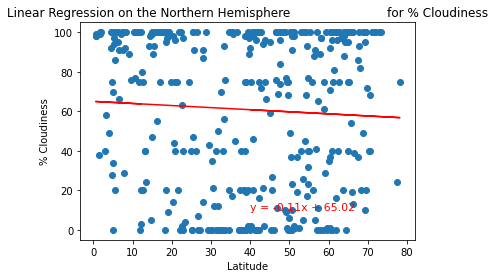

In [31]:
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

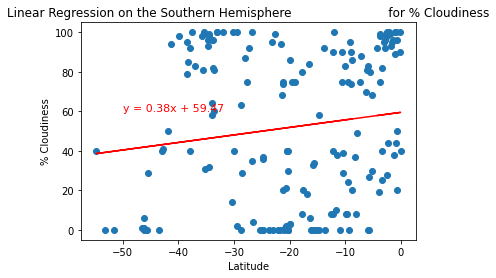

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

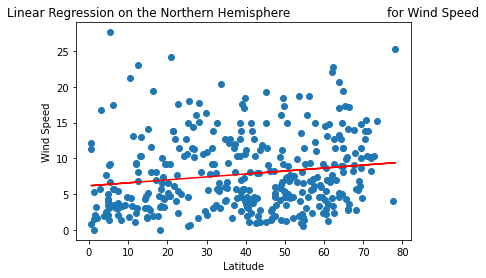

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

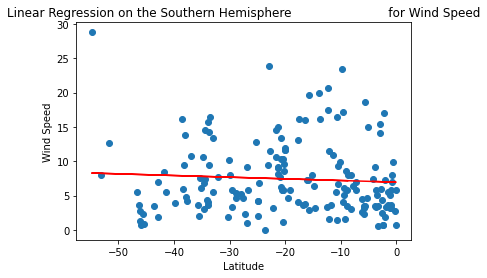

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [35]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config1 import g_key

In [36]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Tamandare,BR,2022-06-21 23:39:05,-8.7597,-35.1047,76.87,80,86,7.92
1,1,Gazli,UZ,2022-06-21 23:39:06,40.1333,63.4500,78.03,23,2,11.12
2,2,Rikitea,PF,2022-06-21 23:38:40,-23.1203,-134.9692,73.17,64,95,9.51
3,3,Lebu,CL,2022-06-21 23:39:06,-37.6167,-73.6500,51.22,85,100,4.23
4,4,Cherskiy,RU,2022-06-21 23:39:07,68.7500,161.3000,51.53,36,49,5.61


In [37]:
# Get the data types.
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [38]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!conda install -c conda-forge gmaps
!jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


Solving environment: ...working... done

# All requested packages already installed.



Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [39]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [40]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)

In [42]:
! conda info -e

# conda environments:
#
base                  *  C:\Users\vicae\anaconda3
PythonData               C:\Users\vicae\anaconda3\envs\PythonData
data-06-weatherpy        C:\Users\vicae\anaconda3\envs\data-06-weatherpy
rstudio                  C:\Users\vicae\anaconda3\envs\rstudio
weatherpy                C:\Users\vicae\anaconda3\envs\weatherpy



In [43]:
! conda list gmaps

# packages in environment at C:\Users\vicae\anaconda3:
#
# Name                    Version                   Build  Channel
gmaps                     0.9.0                      py_0    conda-forge
